# ISTA 322 Final Project: Comparing Yelp Restaurant Reviews Scores to San Luis Potosi Restaurant Service Review Scores

### Student Information:
#### Kiernan McKeegan

#### ISTA 322 Final Project

#### Due Dec. 11 2024

# Project Summary:

###In this project I am gathering data about Yelp Reviews through their API as well as gathering data a CSV file that contains information about various restaurants, mainly from San Luis Potosi. However I will specifically be looking at the data on the service ratings from these restaurants. My sources are the Yelp API and https://www.kaggle.com/datasets/uciml/restaurant-data-with-consumer-ratings?resource=download&select=geoplaces2.csv


# Yelp Reviews API

###Installing Yelp and Mounting Google Drive

In [1]:
#Mounting to google drive
import os, sys
from google.colab import drive
drive.mount('/content/mnt', force_remount=True)
nb_path='/content/notebooks'
if os.path.exists(nb_path):
  os.unlink(nb_path)
  os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
  sys.path.insert(0,nb_path)

Mounted at /content/mnt


In [2]:
#Using pip to install the yelp API
!pip install yelpapi

In [3]:
#Importing libraries
from yelpapi import YelpAPI
import pandas as pd
from pandas import json_normalize

In [4]:
#Using API key given from yelp
api_key='lHIQgfK9EDv7c3dz_-wDZkKtswU3YER28uruStQGXJ05K9noTlt3CtnaMlwnpp2OlfBQHG0fKhkp8U2d3ZNtQPojQoQOtZDv00FW8qsfxK7tv9hHMUVolW6CZaBHZ3Yx'
yelp_api=YelpAPI(api_key)

In [5]:
#Transforming data to make each Seafood category into a dataframe in San Luis Potosi
slp_seafood=yelp_api.search_query(term='Seafood', location='San Luis Potosi', limit=50)
slp_seafood_df=json_normalize(slp_seafood['businesses'])
slp_seafood_df['restaurant_category']='Seafood'
#Transforming data to make each Mexican food category into a dataframe in San Luis Potosi
slp_mexicanfood=yelp_api.search_query(term='Mexican', location='San Luis Potosi', limit=50)
slp_mexicanfood_df=json_normalize(slp_mexicanfood['businesses'])
slp_mexicanfood_df['restaurant_category']='Mexican'
#Transforming data to make each Bar  category into a dataframe in San Luis Potosi
slp_bar=yelp_api.search_query(term='Bar', location='San Luis Potosi', limit=50)
slp_bar_df=json_normalize(slp_bar['businesses'])
slp_bar_df['restaurant_category']='Bar'
#Transforming data to make each Burger category into a dataframe in San Luis Potosi
slp_burger=yelp_api.search_query(term='Burger', location='San Luis Potosi', limit=50)
slp_burger_df=json_normalize(slp_burger['businesses'])
slp_burger_df['restaurant_category']='Burgers'
#Transforming data to make each Cafeteria category into a dataframe in San Luis Potosi
slp_cafeteria=yelp_api.search_query(term='Cafeteria', location='San Luis Potosi', limit=50)
slp_cafeteria_df=json_normalize(slp_cafeteria['businesses'])
slp_cafeteria_df['restaurant_category']='Cafeteria'
#Transforming data to make each Italian category into a dataframe in San Luis Potosi
slp_italian=yelp_api.search_query(term='Italian', location='San Luis Potosi', limit=50)
slp_italian_df=json_normalize(slp_italian['businesses'])
slp_italian_df['restaurant_category']='Italian'
#Transforming data to make each Fast Food category into a dataframe in San Luis Potosi
slp_fastfood=yelp_api.search_query(term='Fast Food', location='San Luis Potosi', limit=50)
slp_fastfood_df=json_normalize(slp_fastfood['businesses'])
slp_fastfood_df['restaurant_category']='Fast_Food'
#Transforming data to make each Family category into a dataframe in San Luis Potosi
slp_family=yelp_api.search_query(term='Family', location='San Luis Potosi', limit=50)
slp_family_df=json_normalize(slp_family['businesses'])
slp_family_df['restaurant_category']='Family'
#Transforming data to make each Pizzeria category into a dataframe in San Luis Potosi
slp_pizzeria=yelp_api.search_query(term='Pizzeria', location='San Luis Potosi', limit=50)
slp_pizzeria_df=json_normalize(slp_pizzeria['businesses'])
slp_pizzeria_df['restaurant_category']='Pizzeria'

In [6]:
#Combining all the previous Restaurant Category dataframes into one dataframe
slp_restaurantsdf=pd.concat([slp_seafood_df, slp_bar_df, slp_cafeteria_df,slp_italian_df,slp_pizzeria_df,slp_family_df,slp_fastfood_df,slp_burger_df,slp_mexicanfood_df], ignore_index=True)
slp_restaurantsdf=slp_restaurantsdf[['rating','restaurant_category','name','id','url']]
slp_restaurantsdf=slp_restaurantsdf.rename(columns={'rating': 'yelp_rating'})
slp_restaurantsdf

,yelp_rating,restaurant_category,name,id,url
0,4.4,Seafood,La Bocana,TezQMLElwYvSPPyIralShw,https://www.yelp.com/biz/la-bocana-san-luis-po...
1,4.3,Seafood,El Costeñito,2LcTTCdUjmCZHqTZnSYijQ,https://www.yelp.com/biz/el-coste%C3%B1ito-san...
2,5.0,Seafood,La Bocana II,c7ePlnc5U8XoRSjNdwGPUw,https://www.yelp.com/biz/la-bocana-ii-jard%C3%...
3,4.0,Seafood,La Chiquita del Caribe,kGG6NdYymrDrbILW98xQgw,https://www.yelp.com/biz/la-chiquita-del-carib...
4,2.8,Seafood,Santo Mar,Ld59D-tvhRjPHzGz0slqgw,https://www.yelp.com/biz/santo-mar-san-luis-po...
...,...,...,...,...,...
244,4.0,Mexican,La Cabaña de Pecos,PqdPsMGc1SW6p2Z1XL9u8w,https://www.yelp.com/biz/la-caba%C3%B1a-de-pec...
245,5.0,Mexican,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,https://www.yelp.com/biz/la-fogatita-san-luis-...
246,5.0,Mexican,Las Cazuelas,4Kt0zhI535U0Vra-_4gQZQ,https://www.yelp.com/biz/las-cazuelas-san-luis...
247,4.2,Mexican,Mesón de San Pascual,SdfZhCyR22XVXLTGrmYyCA,https://www.yelp.com/biz/mes%C3%B3n-de-san-pas...


# CSV File for Service Data

### Importing CSV from drive

In [7]:
#Importing CSV file from my drive containing service rating info
#It's worth noting that the service rating goes on a scale from 0-2
service_ratings_info=pd.read_csv('/content/mnt/My Drive/rating_final.csv')
service_ratings_info

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


These CSV files were pulled from the same data set, however some of the data is broken up into different CSV files. So I need to merge all the CSV files together containing the information I want.

In [8]:
#Importing the other CSV file so that I can join them to include the cuisine type
cuisine_data=pd.read_csv('/content/mnt/My Drive/chefmozcuisine.csv')
cuisine_data

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food
...,...,...
911,132005,Seafood
912,132004,Seafood
913,132003,International
914,132002,Seafood


Now merge the two CSV files together

In [9]:
#merging using 'outer' to keep all columns from both tables, will clean later
service_cuisine=service_ratings_info.merge(cuisine_data, how='outer', on = 'placeID')
service_cuisine

,userID,placeID,rating,food_rating,service_rating,Rcuisine
0,NaN,132001,NaN,NaN,NaN,Dutch-Belgian
1,NaN,132002,NaN,NaN,NaN,Seafood
2,NaN,132003,NaN,NaN,NaN,International
3,NaN,132004,NaN,NaN,NaN,Seafood
4,NaN,132005,NaN,NaN,NaN,French
...,...,...,...,...,...,...
2130,U1030,135109,0.0,0.0,0.0,Italian
2131,U1020,135109,2.0,2.0,1.0,Italian
2132,U1051,135109,1.0,1.0,1.0,Italian
2133,U1041,135109,1.0,2.0,1.0,Italian


Merge this data frame with another CSV file that contains the information about the names of the restaurants.

In [10]:
#uploading csv file from drive
geography=pd.read_csv('/content/mnt/My Drive/geoplaces2.csv')
geography=geography[['placeID','name']]
geography

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rinc�n de San Francisco
3,132667,little pizza Emilio Portes Gil
4,132613,carnitas_mata
...,...,...
125,132866,Chaires
126,135072,Sushi Itto
127,135109,Paniroles
128,135019,Restaurant Bar Coty y Pablo


Finally, merge this with the CSV file containing the service ratings and cuisine types. Make sure to drop all NA values that don't have a restaurant name or have a cuisine type associated with them.

In [11]:
#Combining all CSV files into a final one containing all desired information
final_csv_service=service_cuisine.merge(geography, how='outer', on = 'placeID')
final_csv_service=final_csv_service.dropna(subset='name')
final_csv_service=final_csv_service.dropna(subset='Rcuisine')
final_csv_service

,userID,placeID,rating,food_rating,service_rating,Rcuisine,name
403,U1067,132560,1.0,0.0,0.0,Regional,puesto de gorditas
404,U1082,132560,0.0,0.0,0.0,Regional,puesto de gorditas
405,U1050,132560,0.0,2.0,0.0,Regional,puesto de gorditas
406,U1087,132560,1.0,2.0,1.0,Regional,puesto de gorditas
415,U1108,132572,1.0,2.0,1.0,Cafeteria,Cafe Chaires
...,...,...,...,...,...,...,...
2117,U1002,135106,1.0,1.0,1.0,Mexican,El Rinc�n de San Francisco
2130,U1030,135109,0.0,0.0,0.0,Italian,Paniroles
2131,U1020,135109,2.0,2.0,1.0,Italian,Paniroles
2132,U1051,135109,1.0,1.0,1.0,Italian,Paniroles


In [12]:
#Creating backup for the CSV file incase
backup_copy=final_csv_service

Making the dataframe for the average service rating among each buissness

In [13]:
#Using groupby to and aggregating to find the average service rating of the different restaurant categories
average_rating=final_csv_service.groupby('Rcuisine')['service_rating'].mean()
average_rating=pd.DataFrame(average_rating)
average_rating=average_rating.reset_index()
#renaming columns to track easier
average_rating=average_rating.rename(columns={'service_rating': 'average_service_rating','Rcuisine':'restaurant_category'})
average_rating

,restaurant_category,average_service_rating
0,American,1.128205
1,Armenian,1.250000
2,Bakery,1.400000
3,Bar,1.085714
4,Bar_Pub_Brewery,1.203390
5,Breakfast-Brunch,0.888889
6,Burgers,0.870968
7,Cafe-Coffee_Shop,1.416667
8,Cafeteria,1.078431
9,Chinese,1.048780


Making the dataframe for the average yelp rating.

In [14]:
#Using groupby and aggregating to find the average rating of the yelp reviews
average_yelp_rating=slp_restaurantsdf.groupby('restaurant_category')['yelp_rating'].mean()
average_yelp_rating=pd.DataFrame(average_yelp_rating)
average_yelp_rating

,yelp_rating
restaurant_category,
Bar,1.918000
Burgers,1.682609
Cafeteria,3.306667
Family,3.860000
Fast_Food,1.100000
Italian,2.825000
Mexican,3.816000
Pizzeria,1.525000
Seafood,2.423810


We can now merge the two data frames together and compare their ratings.

In [15]:
#Combining the dataframes of the yelp reviews and service ratings using an inner join
combined_df=average_yelp_rating.merge(average_rating, how='inner', on = 'restaurant_category')
combined_df

,restaurant_category,yelp_rating,average_service_rating
0,Bar,1.918000,1.085714
1,Burgers,1.682609,0.870968
2,Cafeteria,3.306667,1.078431
3,Family,3.860000,1.500000
4,Fast_Food,1.100000,0.956044
5,Italian,2.825000,0.961538
6,Mexican,3.816000,1.079832
7,Pizzeria,1.525000,1.039216
8,Seafood,2.423810,1.177419


#Loading Data into AWS

This part of the project I will be installing my sql connector and then making the functions for my AWS database.

In [16]:
#Installing mmysql so I can use it for queries
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.8 MB/s eta 0:00:00


In [17]:
#importing necessary packages
import mysql.connector
import numpy as np

In [18]:
#creating my sql_head, run_query, and get_conn_cur functions
mysql_address  = 'kiernanista322db.c52u8syaoei8.us-east-1.rds.amazonaws.com'
mysql_username='Kiernan'
mysql_password='BaileyBoo2025!'
mysql_database = 'kiernanista322db'
def get_conn_cur():
    cnx = mysql.connector.connect(user=mysql_username, password=mysql_password,
          host=mysql_address,
          database=mysql_database, port='3306');
    return (cnx, cnx.cursor())

In [19]:
def run_query(query_string):
  conn, cur=get_conn_cur()
  cur.execute(query_string)
  my_data=cur.fetchall()
  result_df=pd.DataFrame(my_data, columns=cur.column_names)
  cur.close()
  conn.close()
  return result_df

In [20]:
def sql_head(table_name):
  conn, cur=get_conn_cur()
  sql_head_query='''SELECT * FROM information_schema.columns WHERE table_name='%s' LIMIT 5''' % table_name
  cur.execute(sql_head_query)
  my_data=cur.fetchall()
  result_df=pd.DataFrame(my_data, columns=cur.column_names)
  cur.close()
  conn.close()
  return result_df

Total SLP Restaurant info Table




Create SQL table to retrieve data about each buissness

In [21]:
#describes what columns to include when creating the table in SQL
total4_restaurants=slp_restaurantsdf[['name','id','yelp_rating']].drop_duplicates()

In [22]:
#Using data types to succesfully create the table
tc='''CREATE TABLE total4_restaurants(
  name VARCHAR(255),
  id VARCHAR(255),
  yelp_rating INT
)'''
conn, cur=get_conn_cur()
# Check if the table exists before creating it
cur.execute("SHOW TABLES LIKE 'total4_restaurants'")
table_exists = cur.fetchone()

if not table_exists:
  cur.execute(tc)
  conn.commit()
  print("Table 'total4_restaurants' created successfully.")
else:
  print("Table 'total4_restaurants' already exists.")

Table 'total4_restaurants' already exists.


In [23]:
#creating table in numpy library
total4_restaurants_np=total4_restaurants.to_numpy();
data_tupsc=tuple(map(tuple, total4_restaurants_np))

In [24]:
#executing creating table
ic='''INSERT INTO total4_restaurants(name, id, yelp_rating) VALUES (%s, %s, %s)'''
conn, cur=get_conn_cur()
cur.executemany(ic, data_tupsc)
conn.commit()
conn.close()

In [25]:
#using sql_head function previously defined to view table
sql_head(table_name='total4_restaurants')

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,COLUMN_NAME,ORDINAL_POSITION,COLUMN_DEFAULT,IS_NULLABLE,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH,CHARACTER_OCTET_LENGTH,...,DATETIME_PRECISION,CHARACTER_SET_NAME,COLLATION_NAME,COLUMN_TYPE,COLUMN_KEY,EXTRA,PRIVILEGES,COLUMN_COMMENT,GENERATION_EXPRESSION,SRS_ID
0,def,kiernanista322db,total4_restaurants,id,2,None,YES,varchar,255.0,1020.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(255),,,"select,insert,update,references",,,None
1,def,kiernanista322db,total4_restaurants,name,1,None,YES,varchar,255.0,1020.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(255),,,"select,insert,update,references",,,None
2,def,kiernanista322db,total4_restaurants,yelp_rating,3,None,YES,int,NaN,NaN,...,None,None,None,int,,,"select,insert,update,references",,,None


#Restaurant Service Rating Table

In [26]:
#describes what columns to use when creating table in SQL
service_table2=final_csv_service[['name','Rcuisine','service_rating','placeID']]

In [27]:
#using data types to succesfully create tables
tc5='''CREATE TABLE service_table2(
  name VARCHAR(255),
  Rcuisine VARCHAR(255),
  service_rating INT,
  placeID VARCHAR(255)
)'''
conn, cur=get_conn_cur()
# Check if the table exists before creating it
cur.execute("SHOW TABLES LIKE 'service_table2'")
table_exists = cur.fetchone()

if not table_exists:
  cur.execute(tc5)
  conn.commit()
  print("Table 'service_table2' created successfully.")
else:
  print("Table 'service_table2' already exists.")

Table 'service_table2' already exists.


In [28]:
#creating table in numpy
service_table2_np=service_table2.to_numpy();
data_tupsc3=tuple(map(tuple, service_table2_np))

In [29]:
#executing create table
ic5='''INSERT INTO service_table2(name, restaurant_category, service_rating,placeID) VALUES (%s, %s, %s,%s)'''
conn, cur=get_conn_cur()
cur.executemany(ic5, data_tupsc3)
conn.commit()
conn.close

<bound method MySQLConnection.close of <mysql.connector.connection.MySQLConnection object at 0x7b9a062f5480>>

In [30]:
#using previously defined sql_head function
sql_head(table_name='service_table2')

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,COLUMN_NAME,ORDINAL_POSITION,COLUMN_DEFAULT,IS_NULLABLE,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH,CHARACTER_OCTET_LENGTH,...,DATETIME_PRECISION,CHARACTER_SET_NAME,COLLATION_NAME,COLUMN_TYPE,COLUMN_KEY,EXTRA,PRIVILEGES,COLUMN_COMMENT,GENERATION_EXPRESSION,SRS_ID
0,def,kiernanista322db,service_table2,name,1,None,YES,varchar,255.0,1020.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(255),,,"select,insert,update,references",,,None
1,def,kiernanista322db,service_table2,placeID,4,None,YES,varchar,255.0,1020.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(255),,,"select,insert,update,references",,,None
2,def,kiernanista322db,service_table2,restaurant_category,2,None,YES,varchar,255.0,1020.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(255),,,"select,insert,update,references",,,None
3,def,kiernanista322db,service_table2,service_rating,3,None,YES,int,NaN,NaN,...,None,None,None,int,,,"select,insert,update,references",,,None


# Creating Queries

Query #1: Someone is looking for a restaurant that has a Yelp Review above 4.

In [31]:
#returns all rows from all columns where parameters are met
qs='''
SELECT * FROM total4_restaurants WHERE yelp_rating > 4
'''
run_query(qs)

,name,id,yelp_rating
0,La Bocana II,c7ePlnc5U8XoRSjNdwGPUw,5
1,Café Pacífico,_ep1A1tl70xn8Tfgr6AQdw,5
2,Mariscos Atlántico,dRCPnmmkTYOeMlmqN_IC4Q,5
3,Chocolatas el Empanada,C6wwn2rLCCSDg2B0aHhsWw,5
4,La Legendaria,ZajgrE7HHbIoT1i7-VlKmA,5
...,...,...,...
273,Pollo Pepe,Xocv-67YOmWe0uo0dSKstQ,5
274,Akopa,4v6FDum0fyIcaEqL_mJpyg,5
275,Comedor Huasteco el Huapanogo,3FqjEBnTlphAcBxIM0aaXA,5
276,Rafa's Tacos,GM-G5s2T19mMIDcVsIps9A,5


Query #2: Someone wants to know what Fast Food restaurants have a service rating higher than 1.

In [32]:
#returns all rows in columns except cuisine type where parameters are met
qt='''
SELECT name,service_rating,placeID FROM service_table2 WHERE restaurant_category = 'Fast_Food' AND service_rating > 1
'''
run_query(qt)

,name,service_rating,placeID
0,tortas hawai,2,132717
1,Subway,2,135021
2,Subway,2,135021
3,pizza clasica,2,135043
4,pizza clasica,2,135043
...,...,...,...
177,Tortas Locas Hipocampo,2,135085
178,Tortas Locas Hipocampo,2,135085
179,Tortas Locas Hipocampo,2,135085
180,Mcdonalds Parque Tangamanga,2,135086


Query #3: Someone wants to know the service rating of all the Mexican Restaurants to pick the best one.

In [33]:
#returns all rows in columns except cuisine type where parameters are met
qk='''
SELECT name, service_rating, placeID FROM service_table2 WHERE restaurant_category = 'Mexican'
'''
run_query(qk)

,name,service_rating,placeID
0,Gorditas Dona Tota,2,132584
1,Gorditas Dona Tota,1,132584
2,Gorditas Dona Tota,2,132584
3,Gorditas Dona Tota,0,132584
4,Gorditas Dona Tota,1,132584
...,...,...,...
1661,El Rinc�n de San Francisco,2,135106
1662,El Rinc�n de San Francisco,0,135106
1663,El Rinc�n de San Francisco,0,135106
1664,El Rinc�n de San Francisco,2,135106


Query #4: Someone wants to know what the Yelp review rating is for the restaurant La Fogatita.

In [34]:
#returns all rows from all columns where parameters are met
ql='''
SELECT * FROM total4_restaurants WHERE name = 'La Fogatita'
'''
run_query(ql)

,name,id,yelp_rating
0,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,2
1,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,5
2,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,2
3,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,2
4,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,5
5,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,5
6,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,5
7,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,5
8,La Fogatita,kAuXfCQCthMuyNQxTptKhQ,5


Query #5: Someone wants to know what restaurants that start with 'La' have a Yelp Review Rating higher than 3.

In [35]:
#returns all rows in all columns except id where parameters are met
qb='''SELECT name, yelp_rating FROM total4_restaurants WHERE name LIKE 'La%' AND yelp_rating > 3'''
run_query(qb)

,name,yelp_rating
0,La Bocana,4
1,La Bocana II,5
2,La Chiquita del Caribe,4
3,La Legendaria,5
4,La Bamba,4
...,...,...
139,La Flama,5
140,La Cabaña Del Buen Sabor,5
141,La Fragua Steak Taco,4
142,La Cabaña de Pecos,4


# Plots

Importing some libraries we can see if there is any trends between this data collected.

In [36]:
#importing libraries
import matplotlib.pyplot as plt

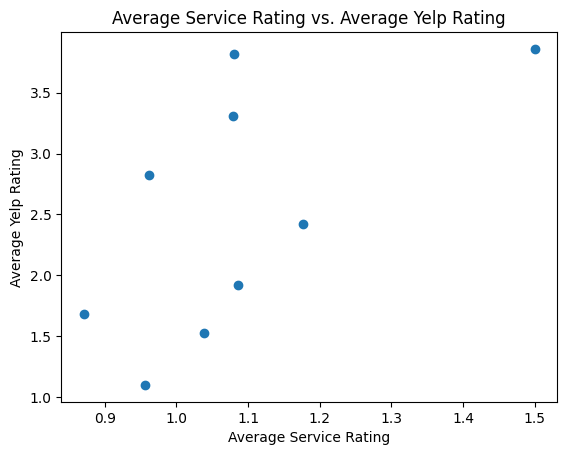

In [37]:
#graphing columns from combined_df using scatter plot
plt.scatter(combined_df['average_service_rating'], combined_df['yelp_rating']) # Changed 'average_yelp_rating' to 'yelp_rating'
plt.xlabel('Average Service Rating')
plt.ylabel('Average Yelp Rating')
plt.title('Average Service Rating vs. Average Yelp Rating')
plt.show()

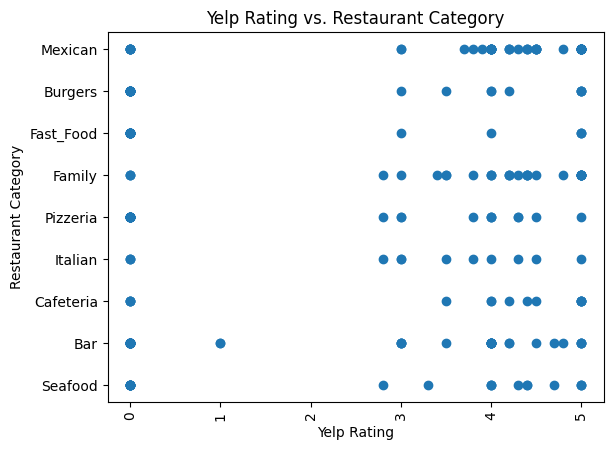

In [38]:
#graphing columns from  slp_restaurantsdf using scatter plot
plt.scatter(slp_restaurantsdf['yelp_rating'], slp_restaurantsdf['restaurant_category'])
plt.xlabel('Yelp Rating')
plt.ylabel('Restaurant Category')
plt.title('Yelp Rating vs. Restaurant Category')
plt.xticks(rotation=90)
plt.show()

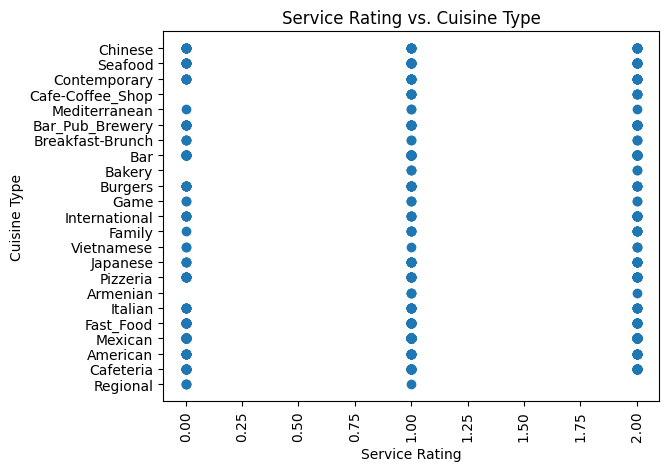

In [39]:
#graphing columns from final_csv_service using scatter plot
plt.scatter(final_csv_service['service_rating'], final_csv_service['Rcuisine'])
plt.xlabel('Service Rating')
plt.ylabel('Cuisine Type')
plt.title('Service Rating vs. Cuisine Type')
plt.xticks(rotation=90)
plt.show()